# **Loads CAPTCHA images**

In [ ]:
import os
from google.colab import drive

# Mount to google drive
drive.mount('/content/drive', force_remount=True)

# Folder path for captcha dataset
folder_path = '/content/drive/MyDrive/CAPTCHA_3000'
#folder_path = '/content/drive/MyDrive/Main'
#folder_path = '/content/drive/MyDrive/CAPTCHA Database'

jpg_files = []

try:
    # Go through all directories and files in folder_path
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith('.jpg'):  # Find all .jpg files in folder
                jpg_files.append(os.path.join(root, file))

    # Now jpg_files contains all the paths to the .jpg files
    # Prints out how many .jpg files have been loaded
    print(f"Found {len(jpg_files)} .jpg files.")

except Exception as e:
    print(f"An error occurred: {e}")

Mounted at /content/drive
Found 3000 .jpg files.


# **Creates CNN Model**

In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

def build_cnn_model(input_shape, num_classes, num_chars):
    # Input shape should be the shape of the CAPTCHA images, e.g., (40, 150, 3)
    # Num_classes is the number of possible characters for each position in the CAPTCHA
    # Num_chars is the length of the CAPTCHA strings

    model = models.Sequential()

    # CNN layers for feature extraction
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten the CNN output to feed into the dense layers
    model.add(layers.Flatten())

    # Dense layer for further processing
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))

    # Output layer, one set of classes for each character in the CAPTCHA
    model.add(layers.Dense(num_chars * num_classes, activation='softmax'))

    # Reshape the output layer to have the shape (num_chars, num_classes)
    model.add(layers.Reshape((num_chars, num_classes)))

    return model

# Define input shape, number of classes, and length of CAPTCHA
input_shape = (40, 150, 3)  # Adjust as per your CAPTCHA image dimensions
num_classes = 62  # Total number of possible characters (0-9, a-z, A-Z)
num_chars = 5  # The length of CAPTCHA codes

# Adjust the learning rate
lr = 1e-4
optimizer = Adam(learning_rate=lr, clipvalue=0.5)  # Adding gradient clipping

# Build and compile the model
model = build_cnn_model(input_shape, num_classes, num_chars)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 38, 148, 32)       896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 19, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 36, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 34, 128)        73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 17, 128)        0

# **Preprocesses Data**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import cv2
import os

# Preprocessing images and labels
def preprocess_image(image_path):
    # Load image
    image = cv2.imread(image_path)

    # Check if the image has been loaded correctly
    if image is None:
        raise ValueError(f"Unable to load image at {image_path}. Please check the file path and access permissions.")

    # If image is loaded, convert color scheme and normalize pixel values
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image / 255.0  # Normalize to 0-1 range
    return image

# Character Index Mapping
import string

# Create a mapping of characters to integers
characters = string.digits + string.ascii_lowercase + string.ascii_uppercase
char_to_index = {char: index for index, char in enumerate(characters)}
index_to_char = {index: char for char, index in char_to_index.items()}



def encode_label(label):
    # Initialize a matrix of zeros with shape (len(label), 62)
    encoded = np.zeros((len(label), 62))

    for i, char in enumerate(label):
        index = char_to_index[char]  # Get the index for this character
        encoded[i, index] = 1  # Set the appropriate element to 1

    return encoded


# Load and preprocess the dataset
images = []
labels = []
count = 0
total_files = len(os.listdir(folder_path))  # Get the total number of files to process

for filename in os.listdir(folder_path):
    if filename.endswith('.jpg'):
        try:
            label = filename.split('.')[0]  # This is a simplification
            image_path = os.path.join(folder_path, filename)
            image = preprocess_image(image_path)

            images.append(image)
            labels.append(encode_label(label))
            count += 1

            # Print progress every 100 images
            if count % 100 == 0:
                print(f"Processed {count}/{total_files} images.")
        except Exception as e:
            print(f"Failed to process image {filename}: {e}")

# Now 'images' and 'labels' are populated with preprocessed data
print(f"Finished processing all images. Total processed images: {count}")

images = np.array(images)
labels = np.array(labels)

Processed 100/3000 images.
Processed 200/3000 images.
Processed 300/3000 images.
Processed 400/3000 images.
Processed 500/3000 images.
Processed 600/3000 images.
Processed 700/3000 images.
Processed 800/3000 images.
Processed 900/3000 images.
Processed 1000/3000 images.
Processed 1100/3000 images.
Processed 1200/3000 images.
Processed 1300/3000 images.
Processed 1400/3000 images.
Processed 1500/3000 images.
Processed 1600/3000 images.
Processed 1700/3000 images.
Processed 1800/3000 images.
Processed 1900/3000 images.
Processed 2000/3000 images.
Processed 2100/3000 images.
Processed 2200/3000 images.
Processed 2300/3000 images.
Processed 2400/3000 images.
Processed 2500/3000 images.
Processed 2600/3000 images.
Processed 2700/3000 images.
Processed 2800/3000 images.
Processed 2900/3000 images.
Processed 3000/3000 images.
Finished processing all images. Total processed images: 3000


# **Split data**

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

# **Train**

In [ ]:
# Train your model
model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
57/57 [==============================] - 29s 472ms/step - loss: 3.6647 - accuracy: 0.1166 - val_loss: 3.4793 - val_accuracy: 0.1277
Epoch 2/100
57/57 [==============================] - 23s 399ms/step - loss: 3.5272 - accuracy: 0.1229 - val_loss: 3.4354 - val_accuracy: 0.1360
Epoch 3/100
57/57 [==============================] - 23s 396ms/step - loss: 3.4745 - accuracy: 0.1249 - val_loss: 3.4170 - val_accuracy: 0.1270
Epoch 4/100
57/57 [==============================] - 22s 392ms/step - loss: 3.4506 - accuracy: 0.1339 - val_loss: 3.4032 - val_accuracy: 0.1570
Epoch 5/100
57/57 [==============================] - 21s 366ms/step - loss: 3.4303 - accuracy: 0.1437 - val_loss: 3.3990 - val_accuracy: 0.1550
Epoch 6/100
57/57 [==============================] - 22s 385ms/step - loss: 3.4072 - accuracy: 0.1559 - val_loss: 3.3886 - val_accuracy: 0.1653
Epoch 7/100
57/57 [==============================] - 21s 367ms/step - loss: 3.3872 - accuracy: 0.1656 - val_loss: 3.3717 - val_accuracy:

# **Test**

In [ ]:
# After training, evaluate model on the testing set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}, Test loss: {test_loss}')

19/19 - 2s - loss: 5.2895 - accuracy: 0.2327 - 2s/epoch - 105ms/step
Test accuracy: 0.23266667127609253, Test loss: 5.2895188331604


# **Pick random CAPTCHA image from testing set and make prections**

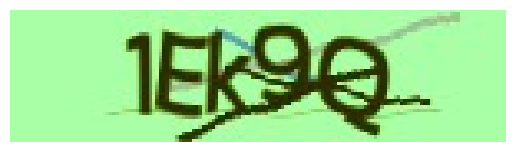

1/1 [==============================] - 0s 39ms/step
Predicted characters: 1E7JG
True characters: 1Ek9Q


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Choose a random image from the training set
random_index = np.random.randint(0, len(X_test))
random_image = X_test[random_index]
random_label = y_test[random_index]

# Display the chosen image
plt.imshow(random_image)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

# Reshape the image to match the model's input format
random_image = np.expand_dims(random_image, axis=0)

# Predict the characters in the image
prediction = model.predict(random_image)

# Decode the prediction
predicted_label = [index_to_char[np.argmax(char)] for char in prediction[0]]

# Convert the one-hot encoded true label to characters
true_label = [index_to_char[np.argmax(char)] for char in random_label]

print(f"Predicted characters: {''.join(predicted_label)}")
print(f"True characters: {''.join(true_label)}")